Lecture 2
===========================================================================

Visualising objective functions
------------

In [1]:
from __future__ import division

In [2]:
import sympy
sympy.init_printing()

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

We start with a simple quadratic - unimodal with minimum at 0,0

In [3]:
x, y = sympy.symbols('x y')

In [4]:
def plotfunc(f, xlim=(-2, 2), ylim=(-2, 2), reddot=None):
    evalf = sympy.lambdify((x, y), f, modules=['numpy'])
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    x1 = np.linspace(xlim[0], xlim[1], 20)
    y1 = np.linspace(xlim[0], xlim[1], 20)
    xx, yy = np.meshgrid(x1, y1)
    zz = evalf(xx, yy)
    surf = ax.plot_surface(xx, yy, zz, 
                           rstride=1, cstride=1, 
                           cmap=cm.binary_r,
                           linewidth=0,
                           antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
    plt.contourf(xx, yy, zz, cmap='binary_r')
    if reddot:
        plt.scatter(reddot[0], reddot[1], s=100, color='red')

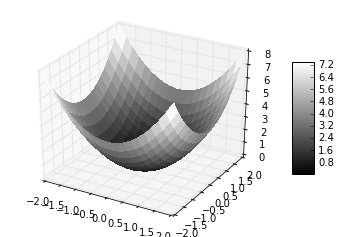

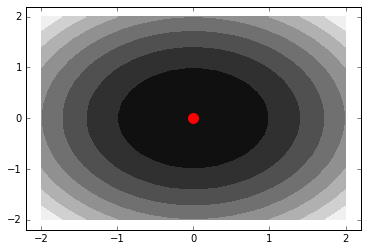

In [5]:
plotfunc(x**2 + y**2, reddot=(0, 0))

Multimodal function similar to the one in the notes

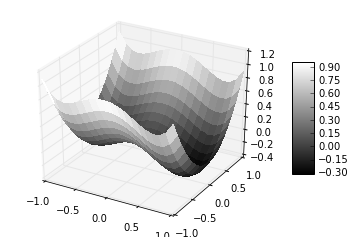

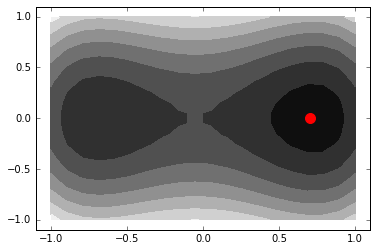

In [6]:
plotfunc(x**4 - x**2 - 0.1*x + y**2, xlim=(-1, 1), ylim=(-1, 1), reddot=(0.7, 0))

Now a simple function showing a saddle point

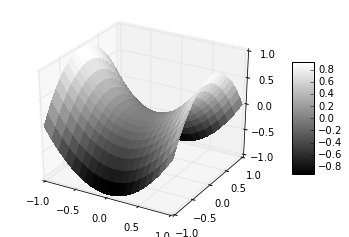

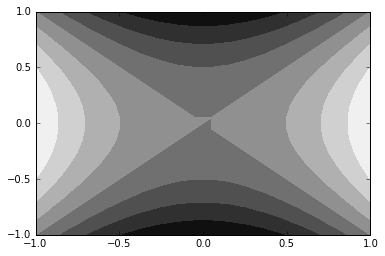

In [7]:
plotfunc(x**2 - y**2, xlim=(-1, 1), ylim=(-1, 1))

Matrix Algebra
------------

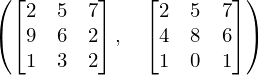

In [8]:
A = sympy.Matrix([[2, 5, 7], 
                  [9, 6, 2],
                  [1, 3, 2]])
B = sympy.Matrix([[2, 5, 7],
                  [4, 8, 6],
                  [1, 0, 1]])
A, B

In [9]:
(A == B)

False

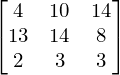

In [10]:
A + B

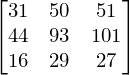

In [11]:
A * B

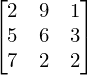

In [12]:
A.T

Vectors are created using `Matrix` as well. Notice that Sympy defaults to creating column vectors.

In [14]:
v = sympy.Matrix([1, 2, 3])
v

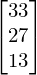

In [15]:
A*v

Remember the inner dimensions must agree

In [16]:
v.T*A

In [17]:
y = sympy.Symbol('y')

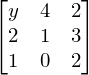

In [18]:
A = sympy.Matrix([[y, 4, 2], 
                  [2, 1, 3], 
                  [1, 0, 2]])
A

In [19]:
A.det()

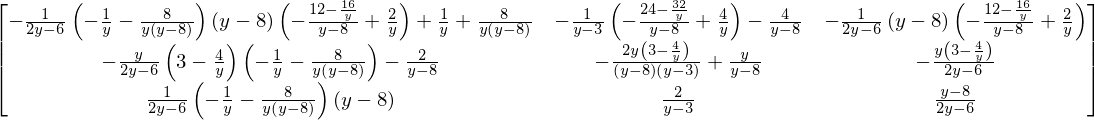

In [20]:
A.inv()

That's a bit difficult to work with, lets ask SymPy to simplify it:

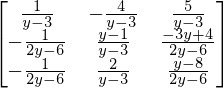

In [26]:
sympy.simplify(A.inv())

**Note** The textbook uses the term *adjoint* to refer to what is now known as the adjugate

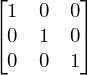

In [23]:
I = sympy.eye(3)
I

In [24]:
C = sympy.Matrix([[4, -5], [2, -3]])

In [25]:
C.eigenvals()

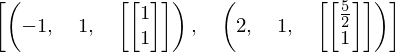

In [26]:
C.eigenvects()

### Question 2

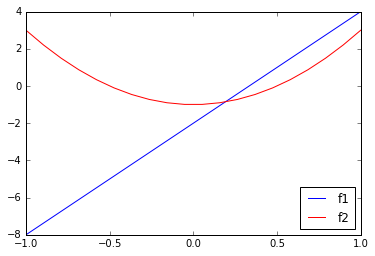

In [45]:
x = np.linspace(-1.0, 1.0, 20)
plt.plot(x, 6*x-2, label='f1')
plt.plot(x, 4*x**2-1, 'r', label='f2')
plt.legend(loc='best')

In [46]:
x, y = sympy.symbols('x y')

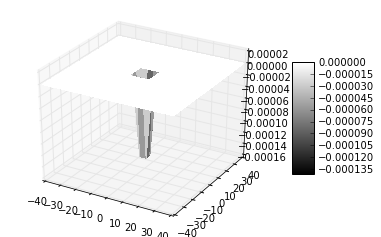

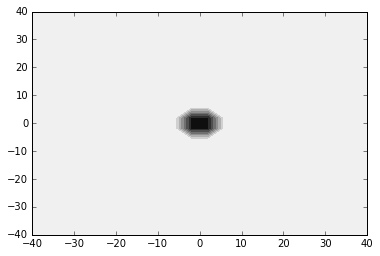

In [47]:
plotfunc(-sympy.exp(-(x**2 + y**2)), xlim=(-40, 40), ylim=(-40, 40))

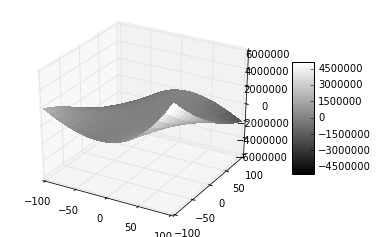

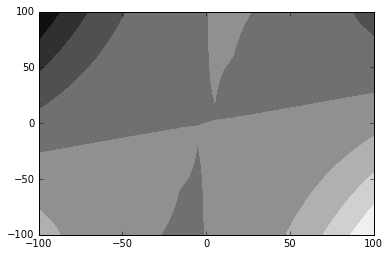

In [48]:
plotfunc(x**3 - 4*x**2*y + x*y**2, xlim=(-100, 100), ylim=(-100, 100))

### Question 3

In [38]:
f = x**2 + x * y + y**2
dfx = sympy.diff(f, x)
dfx

In [40]:
dfy = sympy.diff(f,y)
dfy

In [41]:
sympy.solve([dfx, dfy], [x, y])

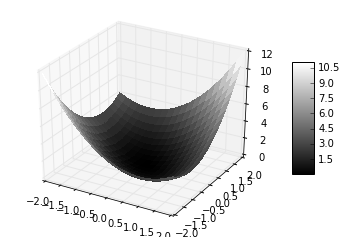

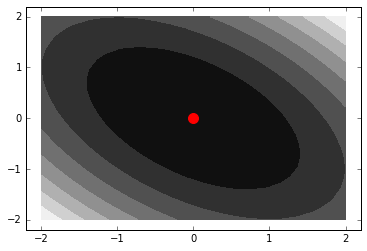

In [42]:
plotfunc(x**2 + x * y + y**2, reddot=(0, 0))

The contour plot along with a 3D plot will give us a pretty good idea where the minimum is:

### Question 4

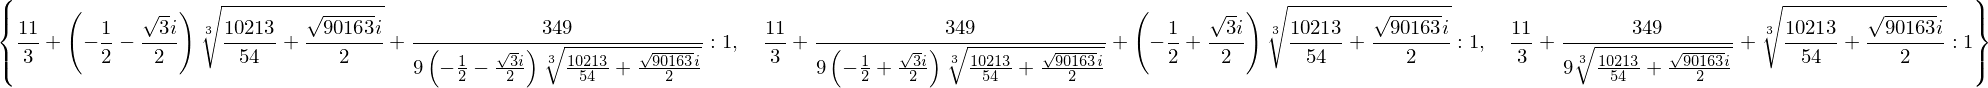

In [49]:
D = sympy.Matrix([[2, 4, 5],
                  [6, 1, 9],
                  [3, 7, 8]])
EV = D.eigenvals()
EV

This is excessive, lets enumerate them:

In [50]:
EVs = [sympy.N(i,4) for i in EV]
EVs